# Introduction

This notebook is used to check the data quality of the stock data returned by yfinance. The notebook is put togerther after some issues were identified. The first part of the notebook plots for each of the 2000 stock tickers a Close price plot. These are visually checked to identify plots that have issues. The plots with visual issues are then combined in a `to_exclude` list. Then these are plotted again to make sure they do have issues. After that we check which of the stock tickers does have a zero Close price in the data. These are added to the `tickers_with_zero_close` list. We then created a `combined` list. And as last step, we add the stock tickers already excluded in the backtest.py program. At the end of this all we save the result in a CSV file (exclude.csv).


# Imports

In [3]:
import pandas as pd
import numpy as np

import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Plot 2000 Stocks

In [9]:
DATAPATH = '/Users/frkornet/Stockie/data/'
exclude = pd.read_csv(f'{DATAPATH}exclude.csv')
tickers = exclude.ticker.to_list()
len(tickers)

81

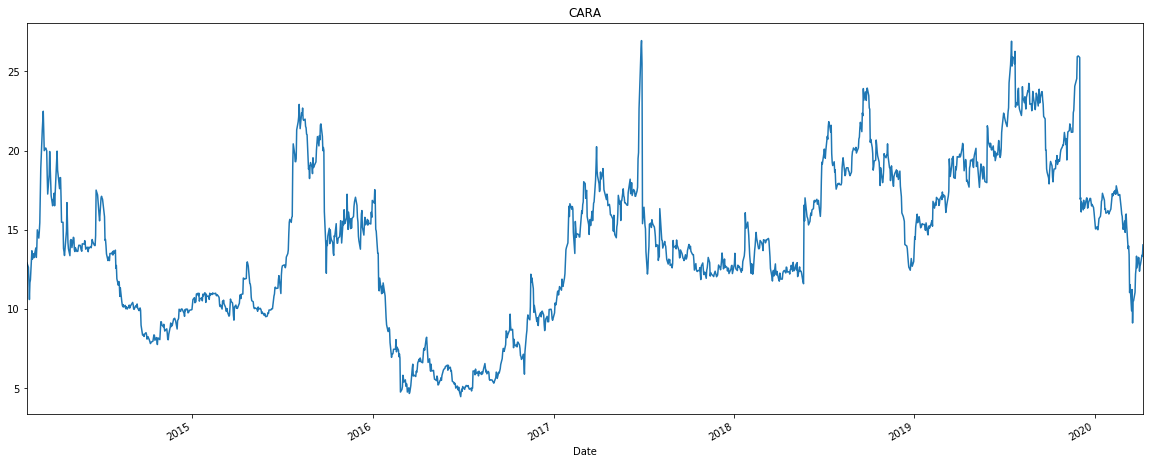

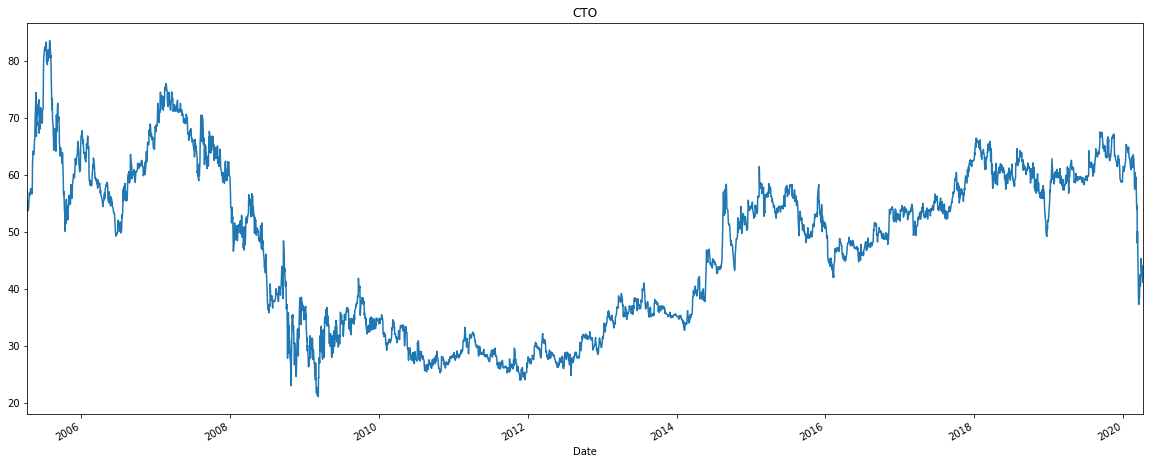

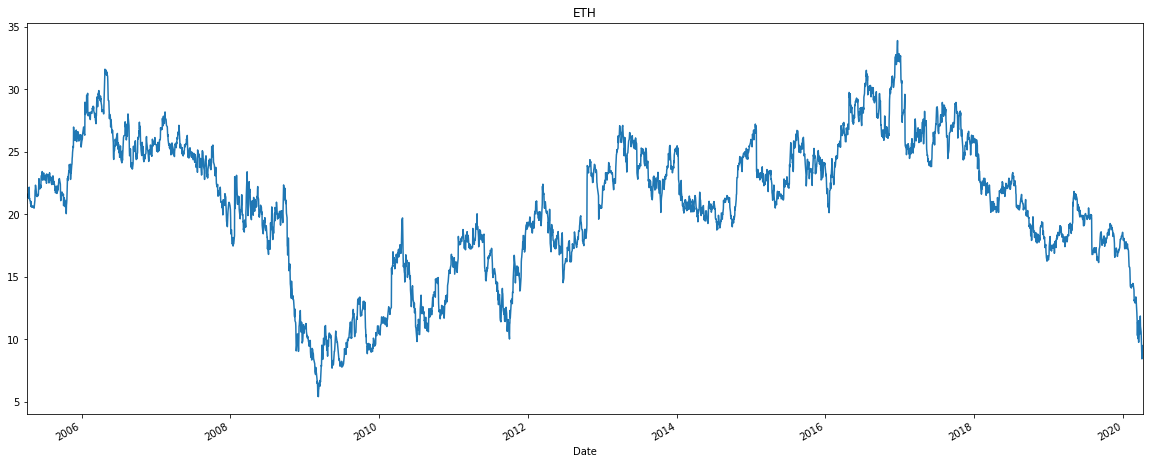

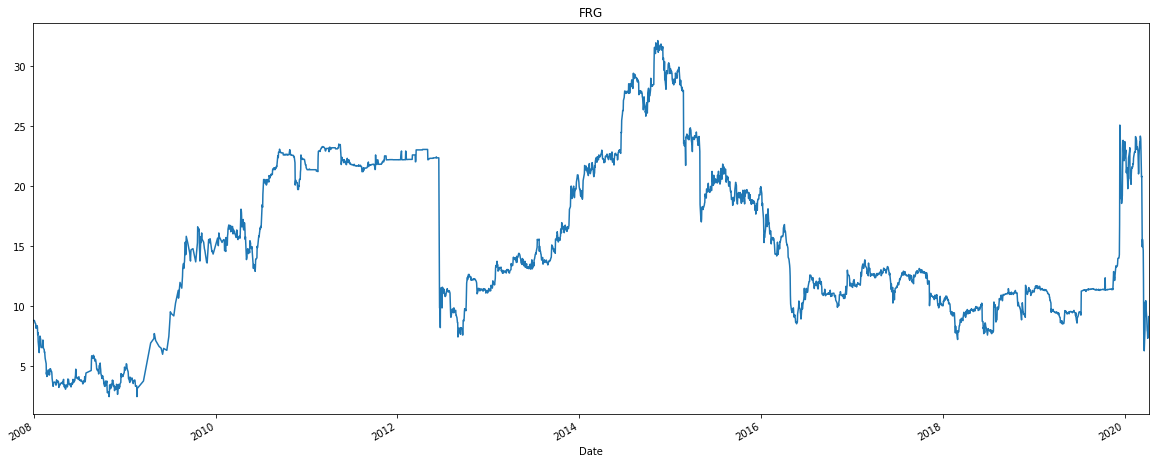

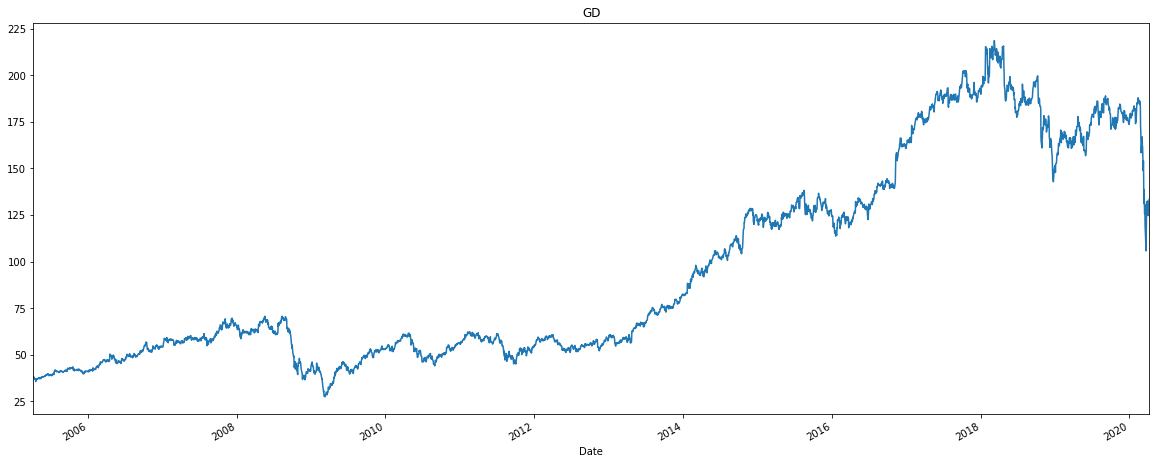

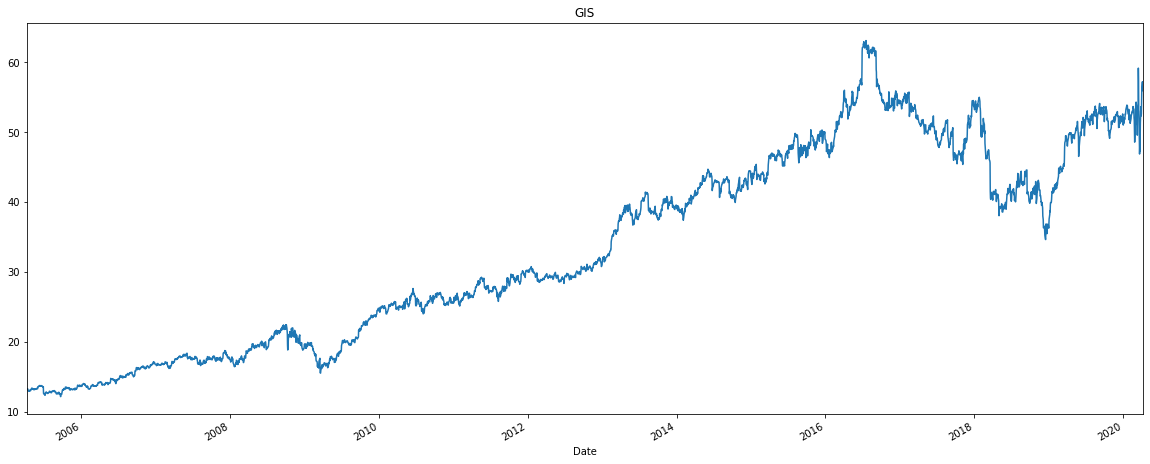

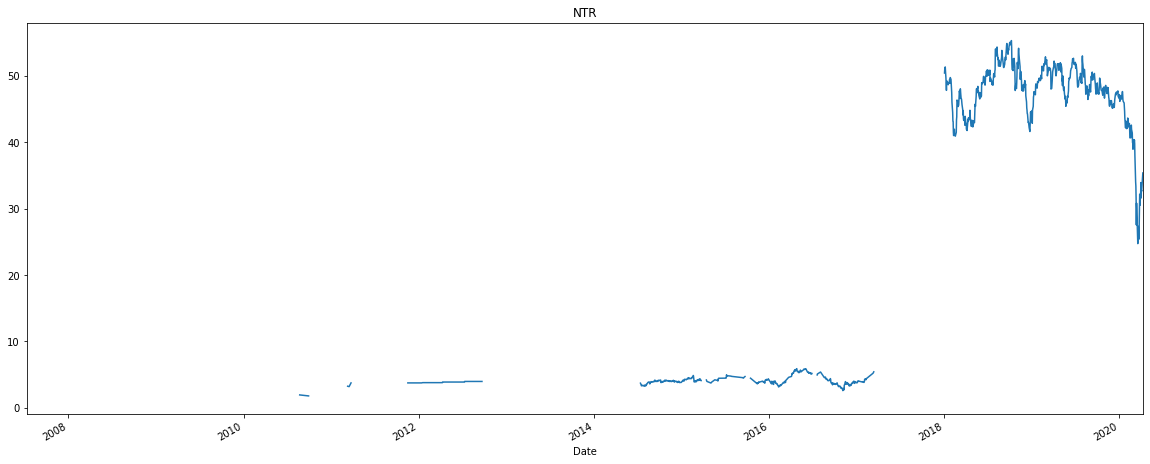

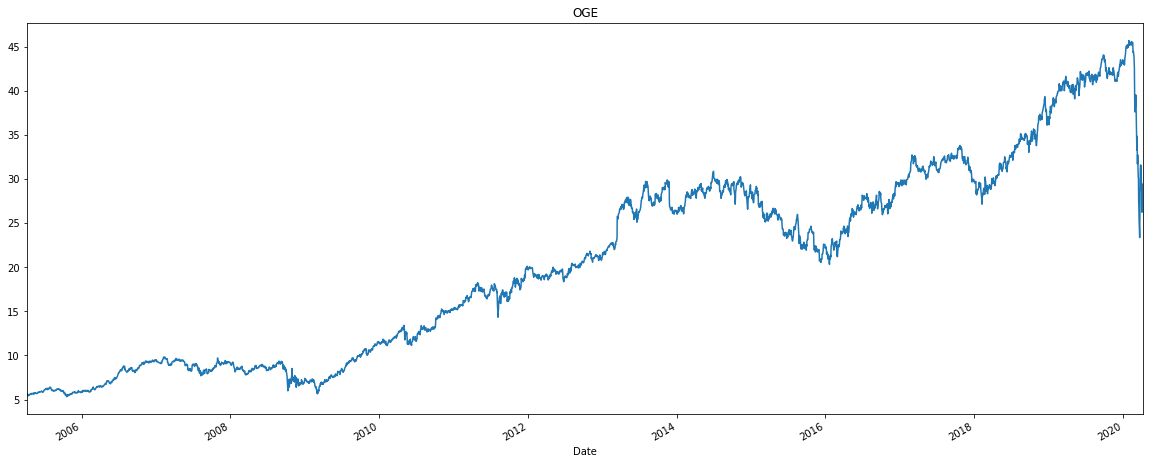

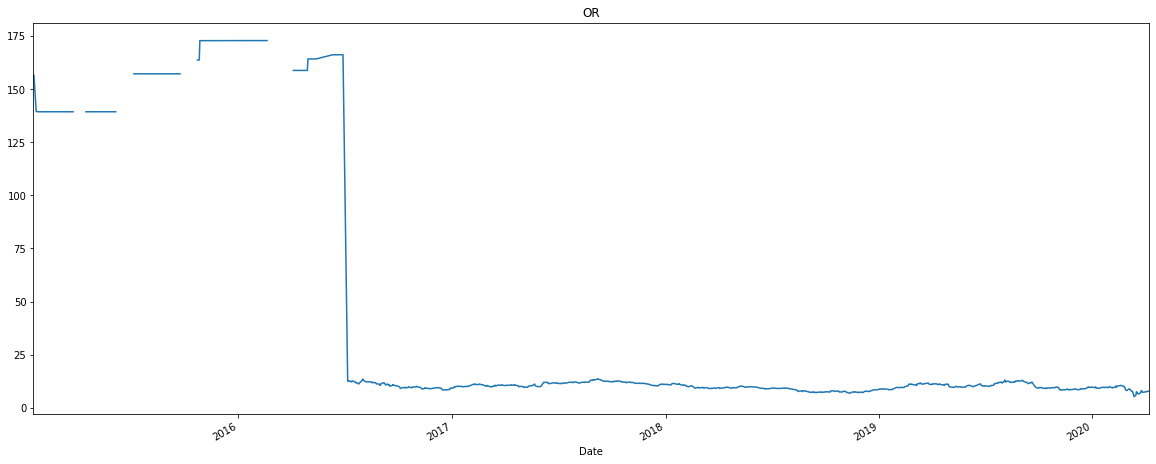

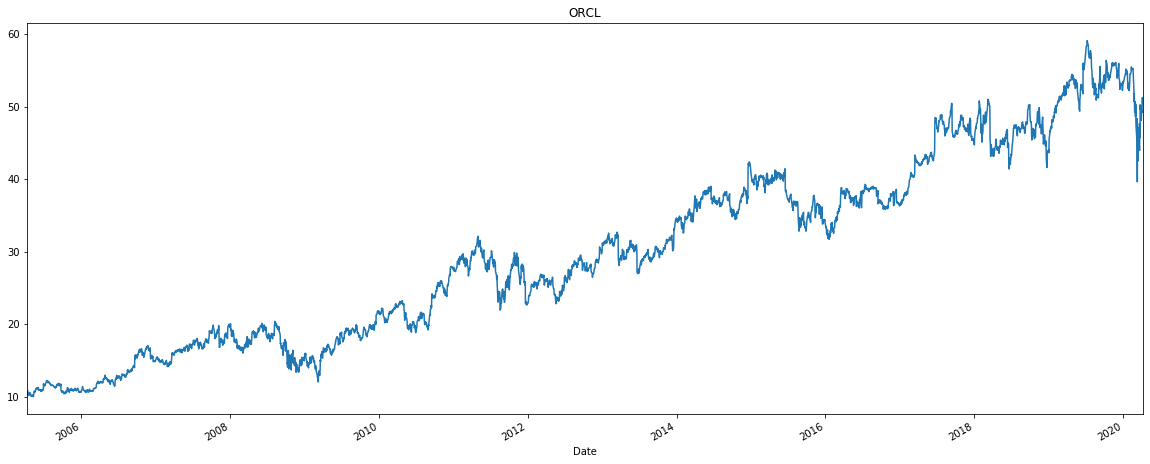

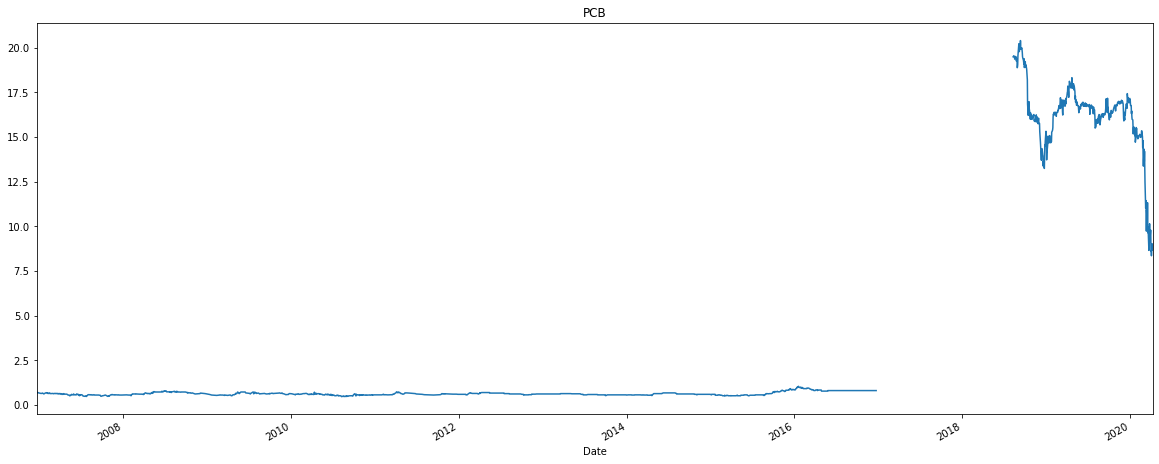

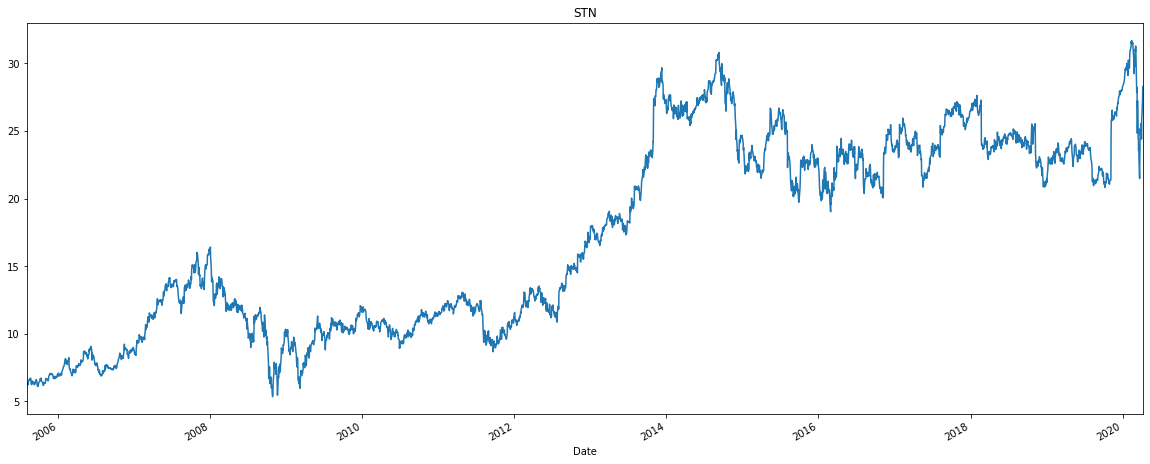

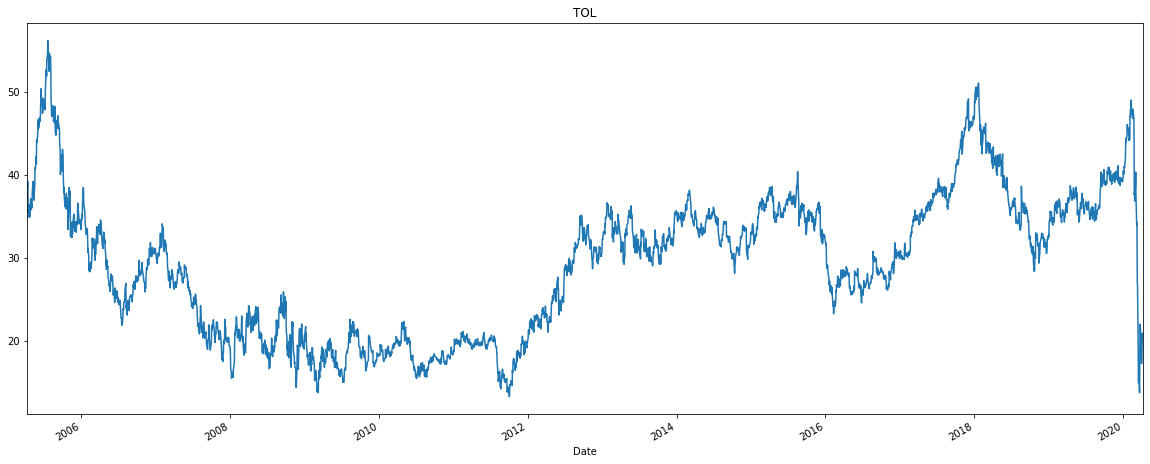

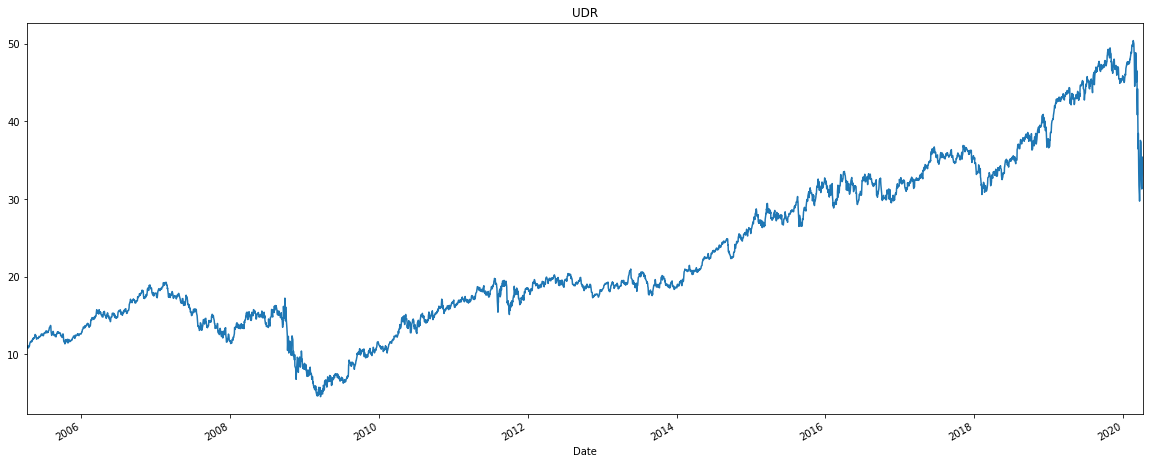

In [23]:
exclude_list = ['CTO', 'ETH', 'GIS', 'NTR', 'OGE', 'OR', 'PCB', 'STN', 'UDR', 'GD', 'TOL', 'ORCL', 'CARA',
                'FRG', 'T', 'OBLEF']
exclude_list = sorted(exclude_list)
for ticker in exclude_list:
    try:
        asset  = yf.Ticker(ticker)
        hist   = asset.history(period='15y')
        hist.Close.plot(figsize=(20,8))
        plt.title(ticker)
        plt.show()
    except:
        print(f"Failed to plot chart for {ticker}")

In [ ]:
to_exclude = ['ARA', 'AMPY', 'BW', 'BKI', 'BHF', 'CRRT', 'FBK', 'FNB', 'EAF', 'HEXO', 'HOSS',
             'INVH', 'JAX', 'KRNY', 'KZR', 'LBC', 'MBIO', 'NK', 'STIM', 'NEXT', 'NTR', 'OR',
             'PCB', 'PUB', 'PIPR', 'QTRHF', 'RCM', 'SBT', 'BLD', 'VMD', 'VST']
to_exclude = sorted(to_exclude)
print(to_exclude)

In [ ]:
for ticker in to_exclude:
    asset  = yf.Ticker(ticker)
    hist   = asset.history(start='2015-01-01')
    hist.Close.plot(figsize=(20,8))
    plt.title(ticker)
    plt.show()

In [ ]:
tickers_with_zero_close = []
for ticker in tickers:
    if ticker in to_exclude:
        continue
    asset  = yf.Ticker(ticker)
    hist   = asset.history(period='max')
    if len(hist.Close.loc[hist.Close == 0]) > 0:
        tickers_with_zero_close.append(ticker)
        
print(len(tickers_with_zero_close), tickers_with_zero_close)

In [ ]:
for ticker in tickers_with_zero_close:
    asset  = yf.Ticker(ticker)
    hist   = asset.history(period='max')
    hist.Close.plot(figsize=(20,8))
    plt.title(ticker)
    plt.show()

In [ ]:
combined = list(set(to_exclude)|set(tickers_with_zero_close))
print(len(combined), combined)

In [ ]:
program_exclude = ['FNWB', 'AIZ', 'ATO', 'BCC', 'CDNS', 'CNA', 'KIN',
                'CTO', 'PAG', 'WELL', 'FTDR', 'QTRHF', 'SWM', 
                'SBT', 'MBRX', 'LBC']
combined = list(set(combined)|set(program_exclude))
print(len(combined), sorted(combined))

In [ ]:
exclude_df = pd.DataFrame(sorted(combined), columns=['ticker'])
exclude_df.head(10)

In [ ]:
exclude_df.to_csv(f'{DATAPATH}exclude.csv', index=False)

In [ ]:
df = pd.read_csv(f'{DATAPATH}exclude.csv')
df